## PREPARING DATA

In [1]:
import numpy as np

def get_poly_eqn(start_val, end_val, as_array: bool):
    X = list(range(start_val, end_val+1))
    y = []
    
    for i in X:
        sample_poly_equation = 2*i**2 + i + 2
        # Y-Intercept = 2
        # m1, m2 = 2, 1 respectively
        y.append(sample_poly_equation)
    
    if as_array == True:
        return np.array(X).reshape(-1, 1), np.array(y).reshape(-1, 1)
    
    else:
        return X, y

In [2]:
X, y = get_poly_eqn(0, 10, as_array=True)

In [3]:
print("This is X: ", X)
print("\nThis is Y: ", y)

This is X:  [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

This is Y:  [[  2]
 [  5]
 [ 12]
 [ 23]
 [ 38]
 [ 57]
 [ 80]
 [107]
 [138]
 [173]
 [212]]


### Visualizing Graph 

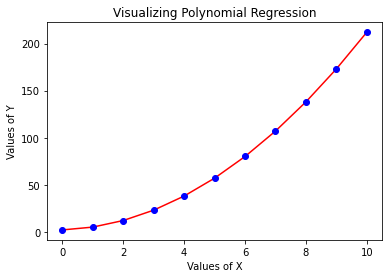

In [4]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'r')
plt.plot(X, y, 'bo')
plt.xlabel("Values of X")
plt.ylabel("Values of Y")
plt.title("Visualizing Polynomial Regression")
plt.show()

#### Let us try Linear Regression in this

In [5]:
## <-- WARNING : This is only for Visualizing that this problem CAN'T be solved by Linear
##     Regression -->

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [6]:
print("Predicted Value:", lin_reg.predict(np.array(X[2]).reshape(-1, 1)))
print("\nActual Value:", y[2])

Predicted Value: [[14.]]

Actual Value: [12]


Ohh... That's not at all right and even Close

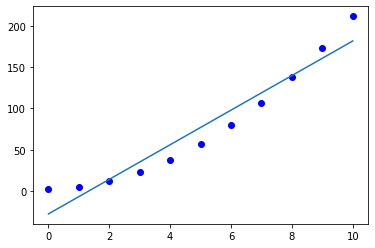

In [7]:
plt.plot(X, y, 'bo')
plt.plot(X, lin_reg.predict(np.array(X).reshape(-1, 1)))
plt.show()

In [8]:
lin_x, lin_y = get_poly_eqn(11, 50, as_array=True) ## Sample Data for predicting
y_lin_pred = lin_reg.predict(lin_x)

In [9]:
from sklearn.metrics import r2_score

r2_score(lin_y, y_lin_pred)

-0.850892513013952

THIS IS NOT AT ALL GOOD, So for this we will use Polynomial Regression

## POLYNOMIAL REGRESSION

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_reg.fit(X_poly, y)

LinearRegression()

In [11]:
print("Predicted Value:", poly_reg.predict(poly_features.fit_transform([X[2]])))
print("\nActual Value:", y[2])

Predicted Value: [[12.]]

Actual Value: [12]


### Yeahhhh, That's Perfect

Making New Data as a Validation Set/for predictiom

In [12]:
new_x, new_y = get_poly_eqn(11, 50, as_array=True)

In [13]:
y_pred = poly_reg.predict(poly_features.fit_transform(new_x))

In [14]:
from sklearn.metrics import r2_score

r2_score(new_y, y_pred)

1.0

### Visualizing Polynomial Regression

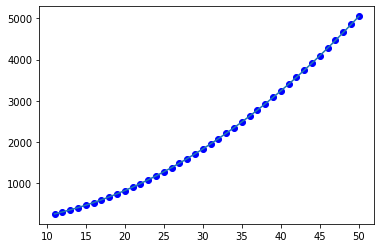

In [15]:
plt.plot(new_x, new_y, 'bo')
plt.plot(new_x, poly_reg.predict(poly_features.fit_transform(new_x)))
plt.show()

It's Perfectly Fitting with the data

In [16]:
poly_reg.coef_

array([[0., 1., 2.]])

In [17]:
poly_reg.intercept_

array([2.])

In [18]:
poly_features.get_feature_names()

['1', 'x0', 'x0^2']

Okay, So this was the POWER Polynomial Regression it has helped us to make our graph Non-Linear and cover more Data Points.Pretty Simple !!

In Real-World Data you will more often deal with this type of Non-Linear Data your data will not be always straight and even sometimes very Noisy. In our Case we have Choosen Polynomial Degree to be 2 and it worked very well... But in more Complex data you might increase your Degree to be more than 2 and it will more Precisely fit to your Data but keep one thing in mind, Increasing the Degree can help you to fit more Data Points but your model can Suck in Validation Set or in Prediction. It has Done very well in Training Doesn't mean that it always do better in Testing !!

Only way to solve it to make your Data as Clean as Possible their are many techniques by which you can make your Data a bit cleaner and bit easier to your model to fit to it more Precisely Like **Normalization, Standard Scalar, Removing Outliers,etc** are some of the Examples of Making your Data CLeaner.

In our Data, *2i^2 + i + 2* we predicted the Slopes to be,

``
 poly_reg.coef_
 array([[0., 1., 2.]]) # Output
``

Y-intercept to be,

``
 poly_reg.intercept_
 array([2.]) # Output
``

Which is Absolutely Correct !!

## USING REAL WORLD DATA

##### Collecting Data (See 'Datasets' folder for csv file)

In [19]:
import pandas as pd

df = pd.read_csv("D:\\pritish\\BigML\\Using-Scikit-Learn\\ipynb-version\\Polynomial-Regression\\datasets\\Position_Salaries.csv")

In [20]:
df.head(4)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000


In [21]:
X_data = df.iloc[:, 1:2]
y_data = df.iloc[:, -1]

In [22]:
X_data = np.array(X_data)
y_data = np.array(y_data)

### GRAPH

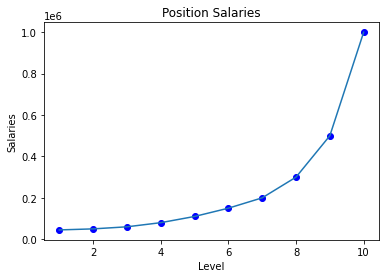

In [23]:
plt.plot(X_data, y_data, 'bo')
plt.plot(X_data, y_data)
plt.xlabel("Level")
plt.ylabel("Salaries")
plt.title("Position Salaries")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

### Making Polynomial Regressor

In [25]:
poly_real = LinearRegression()
poly_refe = PolynomialFeatures(degree=3)
X_real = poly_refe.fit_transform(X_train)
poly_real.fit(X_real, y_train)

LinearRegression()

In [26]:
X_real

array([[   1.,    6.,   36.,  216.],
       [   1.,    1.,    1.,    1.],
       [   1.,    8.,   64.,  512.],
       [   1.,    3.,    9.,   27.],
       [   1.,   10.,  100., 1000.],
       [   1.,    5.,   25.,  125.],
       [   1.,    4.,   16.,   64.],
       [   1.,    7.,   49.,  343.]])

In [27]:
y_real_pred = poly_real.predict(poly_refe.fit_transform(X_test))

In [28]:
from sklearn.metrics import r2_score

r2_score(y_test, y_real_pred)

0.8762695647830296

That's a very Nice Accuracy !!

Assignemt :- Try Increasing the Degree of PolynomialFeatures and see what's the Change in Accuracy ?

(Increasing Degree to 4 will give you 97% Accuracy. Try Yourself !!)